In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et 

In [2]:
sns.set(font_scale=1.5)
sns.set_style("white")

In [3]:
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [4]:
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

[Text(0.5, 18.552527379496873, 'Longitude (Degrees)'),
 Text(57.875, 0.5, 'Latitude (Degrees)'),
 Text(0.5, 1.0, 'Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude')]

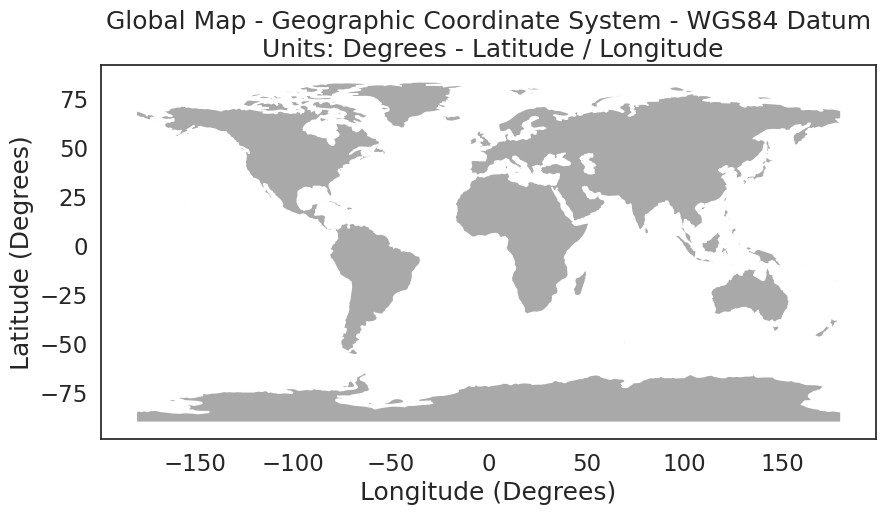

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
worldBound.plot(color='darkgrey', 
                ax=ax)
# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

In [6]:
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', 
              linestyle='dashed')
ax.xaxis.grid(color='gray', 
              linestyle='dashed')

In [7]:
add_points = np.array([[-105.2519,   40.0274], 
                       [  10.75  ,   59.95  ], 
                       [   2.9833,   39.6167]])

In [8]:
city_locations = [Point(xy) for xy in add_points]
city_locations

[<POINT (-105.252 40.027)>, <POINT (10.75 59.95)>, <POINT (2.983 39.617)>]

In [9]:
city_locations = gpd.GeoDataFrame(city_locations, 
                                  columns=['geometry'],
                                  crs=worldBound.crs)
city_locations.head(3)

,geometry
0,POINT (-105.25190 40.02740)
1,POINT (10.75000 59.95000)
2,POINT (2.98330 39.61670)


<Axes: >

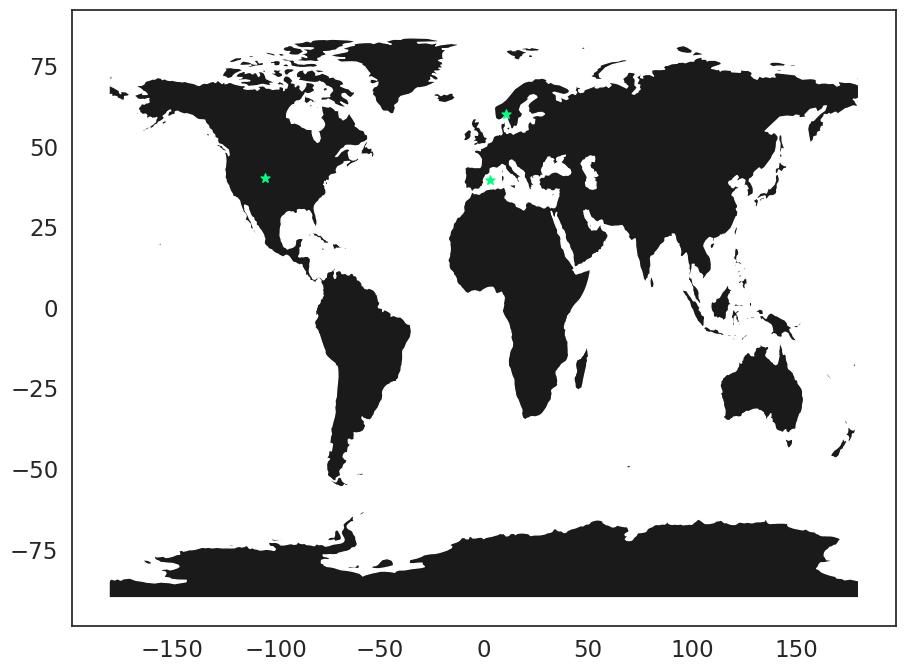

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

worldBound.plot(figsize=(10, 5), color='k',
               ax=ax)
# Add city locations
city_locations.plot(ax=ax, 
                    color='springgreen', 
                    marker='*',
                    markersize=45)

In [11]:
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

In [12]:
graticule_path = os.path.join("data", "spatial-vector-lidar", "global", 
                              "ne_110m_graticules_all", "ne_110m_graticules_15.shp")
graticule = gpd.read_file(graticule_path)

bbox_path = os.path.join("data", "spatial-vector-lidar", "global", 
                         "ne_110m_graticules_all", "ne_110m_wgs84_bounding_box.shp")
bbox = gpd.read_file(bbox_path)

<Axes: >

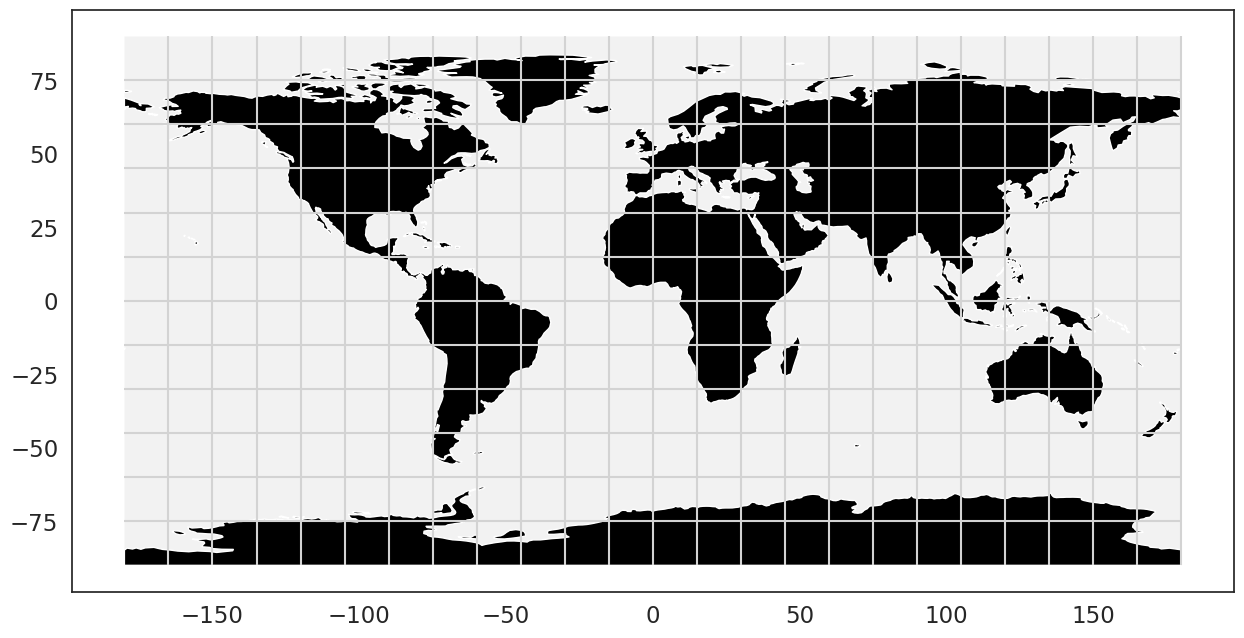

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Add bounding box and graticule layers
bbox.plot(ax=ax, alpha=.1, color='grey')
graticule.plot(ax=ax, color='lightgrey')
worldBound.plot(ax=ax, color='black')

In [14]:
city_locations.plot(ax=ax, 
                    markersize=60, 
                    color='springgreen',
                    marker='*')

<Axes: >

<Figure size 640x480 with 0 Axes>

In [15]:
ax.set(title="World Map - Geographic Coordinate Reference System (long/lat degrees)",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)");

In [16]:
worldBound_robin = worldBound.to_crs('+proj=robin')
graticule_robin = graticule.to_crs('+proj=robin')

<Axes: >

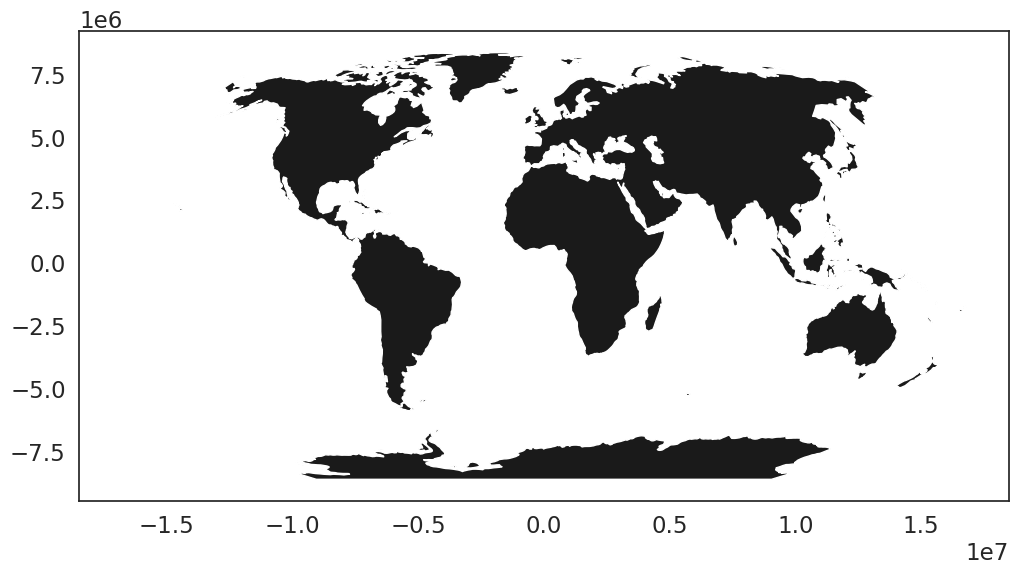

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color='k')

In [18]:
graticule_robin.plot(ax=ax, color='lightgrey')

ax.set(title="World Map: Robinson Coordinate Reference System",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

<Figure size 640x480 with 0 Axes>

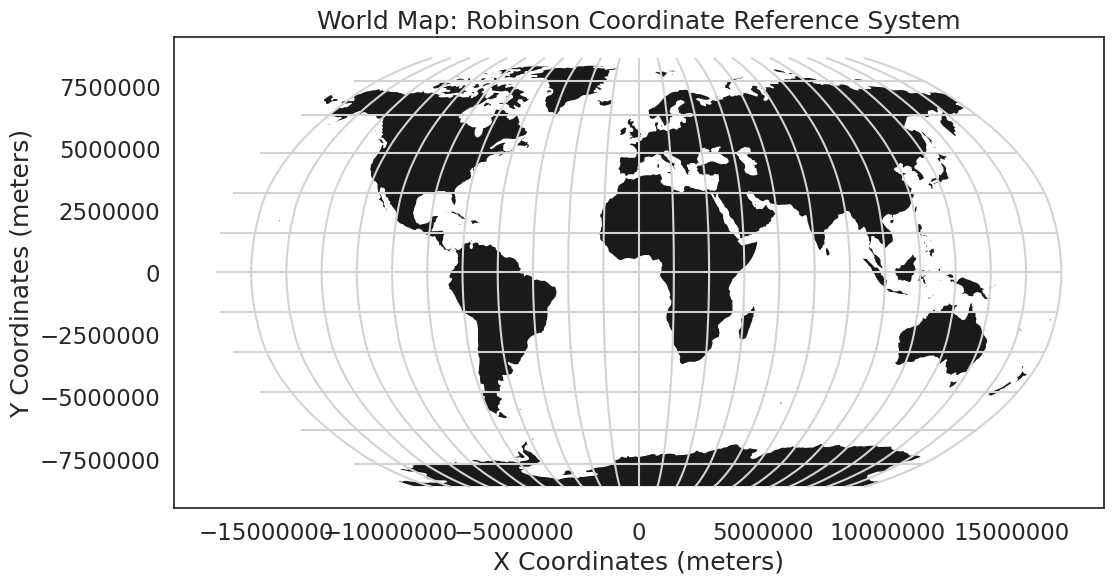

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color='k')

graticule_robin.plot(ax=ax, color='lightgrey')

ax.set(title="World Map: Robinson Coordinate Reference System",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

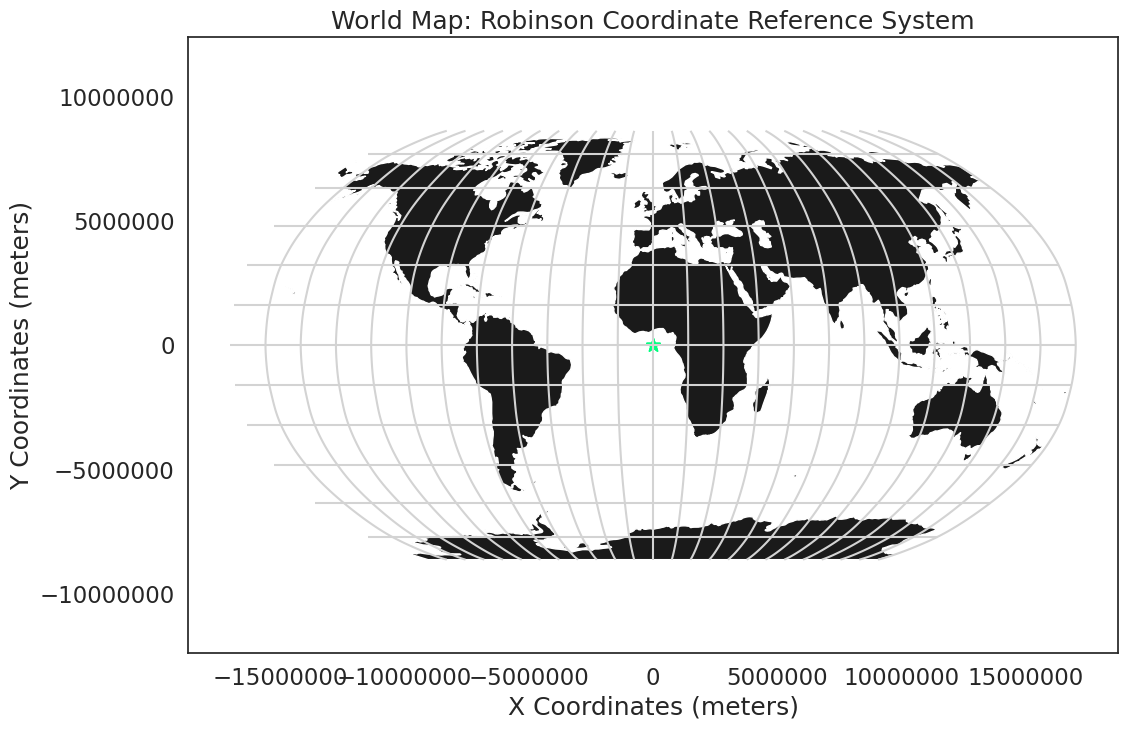

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color='k')
graticule_robin.plot(ax=ax, 
                     color='lightgrey')
city_locations.plot(ax=ax, 
                    marker='*', 
                    color='springgreen', 
                    markersize=100)

ax.set(title="World Map: Robinson Coordinate Reference System", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
    
plt.axis('equal');    

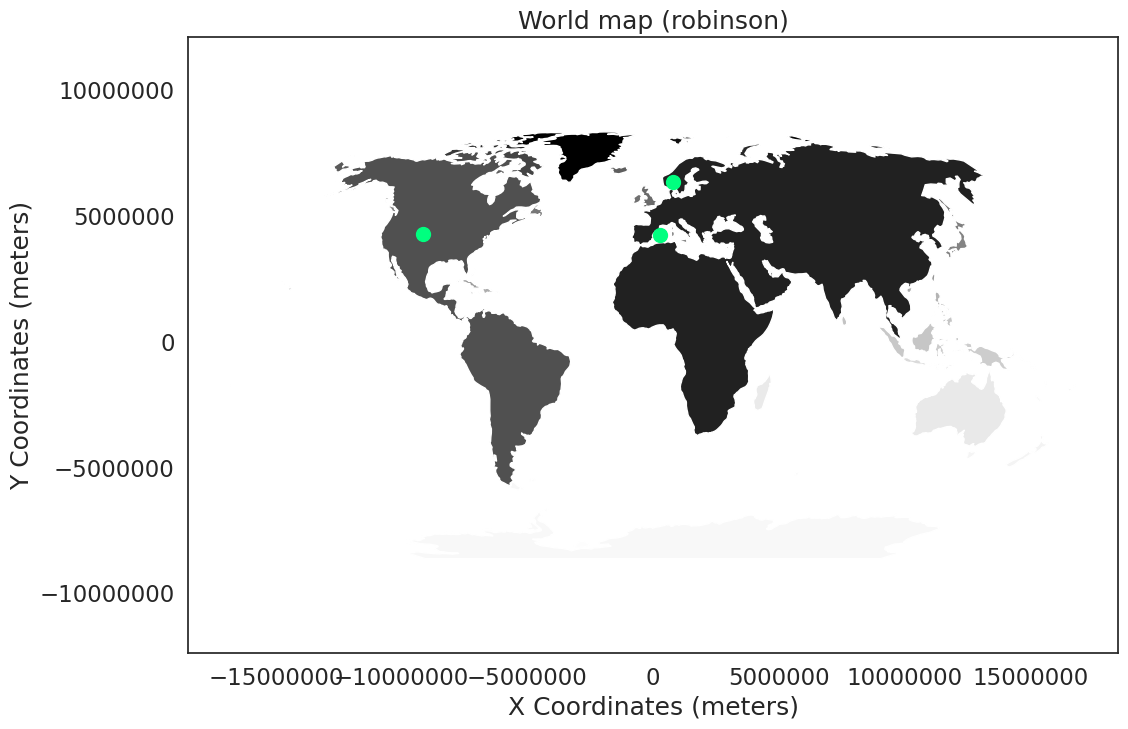

In [21]:
city_locations_robin = city_locations.to_crs(worldBound_robin.crs)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
worldBound_robin.plot(ax=ax, 
                      cmap='Greys')
ax.set(title="World map (robinson)", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")
city_locations_robin.plot(ax=ax, markersize=100, color='springgreen')

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.axis('equal');

In [22]:
graticule_robinson = graticule.to_crs('+proj=robin')
bbox_robinson = bbox.to_crs('+proj=robin')

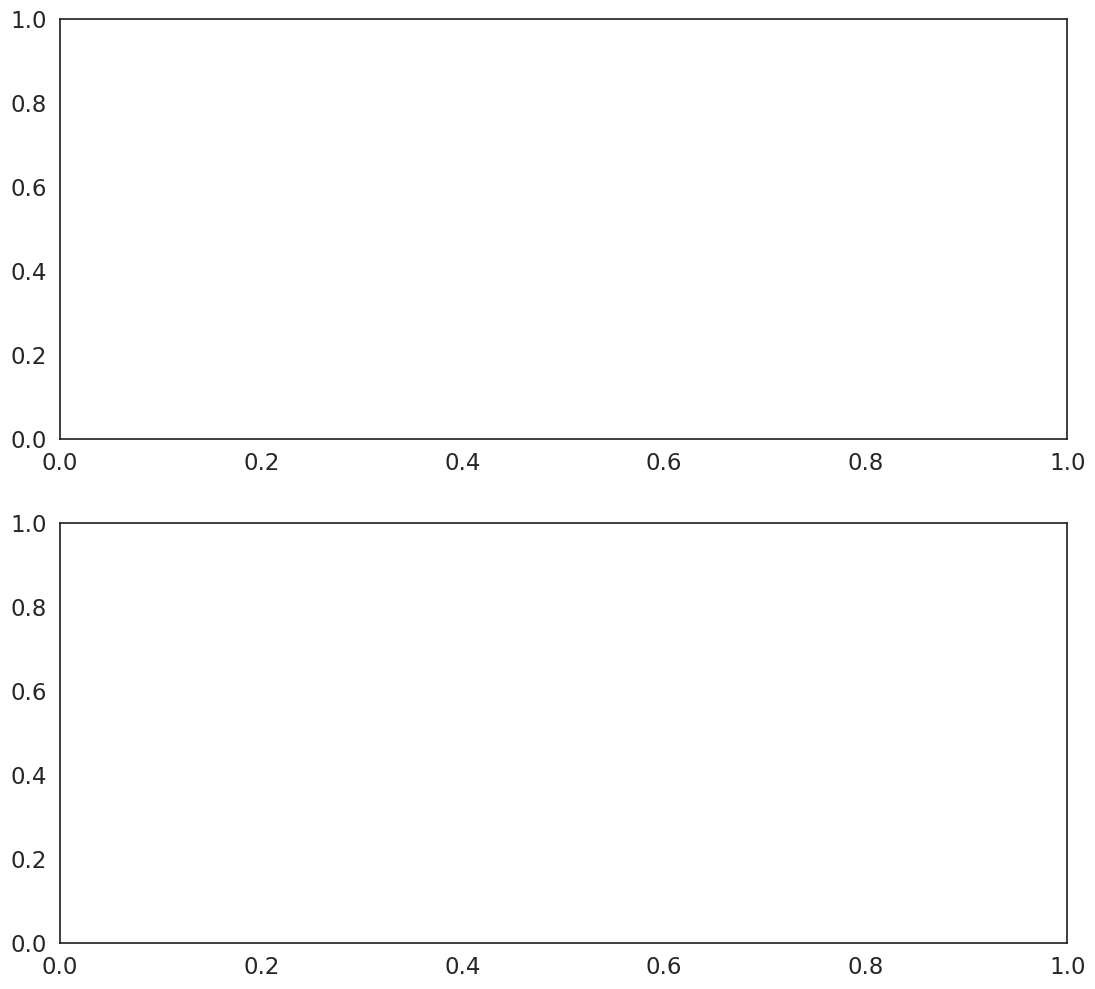

In [23]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(13, 12))

In [24]:
bbox.plot(ax=ax0,
          alpha=.1,
          color='grey')

graticule.plot(ax=ax0,
               color='lightgrey')

worldBound.plot(ax=ax0,
                color='k')

city_locations.plot(ax=ax0,
                    markersize=100,
                    color='springgreen')

ax0.set(title="World Map - Geographic (long/lat degrees)")

[Text(0.5, 1.0, 'World Map - Geographic (long/lat degrees)')]

<Figure size 640x480 with 0 Axes>

In [26]:
bbox_robinson.plot(ax=ax1,
                   alpha=.1,
                   color='grey')

graticule_robinson.plot(ax=ax1,
                        color='lightgrey')

worldBound_robin.plot(ax=ax1,
                      color='k')

city_locations_robin.plot(ax=ax1,
                          markersize=100,
                          color='springgreen')

ax1.set(title="World Map Projected - Robinson (Meters)")

for axis in [ax1.xaxis, ax1.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

<Figure size 640x480 with 0 Axes>